This notebook
 * checks the mask,
 * displays the simulation maps, both ILC and noise,
 * derives the transfer-function,

In [3]:
import numpy as np
import healpy as hp
import os, sys
from astropy.io import fits
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib 
import matplotlib.gridspec as gridspec


import component_separation.MSC.MSC.pospace as ps

from lenscarf.lerepi.visalot import plot_helper as ph
from lenscarf.lerepi.config.cmbs4.data import data_08d as sims_if
sims  = sims_if.ILC_May2022('00')

simids = np.array([0])
nside = 2048
lmax = 2047
lmax_plot = lmax
binspace = 5

could not setup healpix hack. reverting to standard healpy
MSC: using scarf with 1 OMP threads


# Tiniti

In [ ]:
oldtiniti = np.load('/global/cscratch1/sd/sebibel/cmbs4/08d_00_OBD_MF100_test/OBD_matrix/tniti.npy')
newtiniti = np.load('/global/cscratch1/sd/sebibel/cmbs4/08d_00_OBD_MF100_test2/OBD_matrix/tniti.npy')
# oldtiniti = np.load('/global/project/projectdirs/cmbs4/awg/lowellbb/reanalysis/mapphi_intermediate/s08d/tniti.npy')

In [ ]:
plt.plot(np.diag(newtiniti))
plt.plot(np.diag(oldtiniti)*3)
plt.yscale('log')
plt.ylim(4e2,2e3)
plt.xlim(5000, 6000)

In [ ]:
plt.plot(np.diag(newtiniti)/np.diag(oldtiniti))
plt.xlim(5000, 6000)
plt.ylim(1,3)
# np.sum(newtiniti)-np.sum(oldtiniti)

In [ ]:
plt.imshow(newtiniti[::100,::100]/np.max(newtiniti[::100,::100]), cmap='bone_r')
plt.colorbar()

In [ ]:
plt.imshow(oldtiniti[::100,::100]/np.max(oldtiniti[::100,::100]), cmap='bone_r')
plt.colorbar()

# OBD

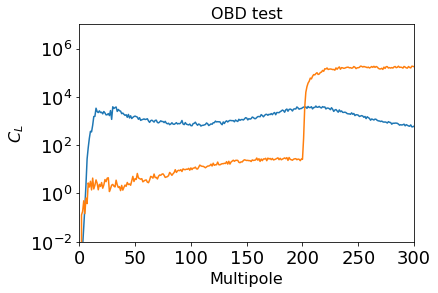

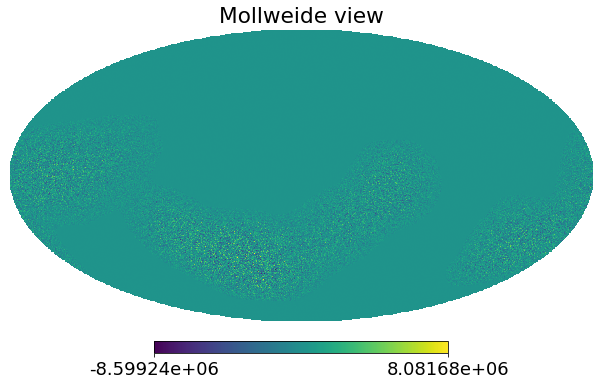

In [5]:
elm = hp.read_alm('/global/cscratch1/sd/sebibel/dlensalot/lenscarf/data_08d/ILC_May2022_00_OBD_r100_tol5e5/ivfs/sim_0000_elm.fits')
blm = hp.read_alm('/global/cscratch1/sd/sebibel/dlensalot/lenscarf/data_08d/ILC_May2022_00_OBD_r100_tol5e5/ivfs/sim_0000_blm.fits')
plt.plot(hp.alm2cl(elm), label='ClEE')
plt.plot(hp.alm2cl(blm), label='ClBB')

plt.title('OBD test', fontsize=16)
plt.xlabel('Multipole', fontsize=16)
plt.ylabel('$C_L$', fontsize=16)

plt.yscale('log')
plt.ylim(1e-2,1e7)
plt.xlim(0,300)
plt.show()
bmap = hp.alm2map(blm, nside=2048)
hp.mollview(bmap)

In [4]:
elm = hp.read_alm('/global/cscratch1/sd/sebibel/dlensalot/lenscarf/data_08d/ILC_May2022_00_OBD_r100_tol5e5/ivfs/sim_0000_elm.fits')
blm = hp.read_alm('/global/cscratch1/sd/sebibel/dlensalot/lenscarf/data_08d/ILC_May2022_00_OBD_r100_tol5e5/ivfs/sim_0000_blm.fits')
plt.plot(hp.alm2cl(elm), label='ClEE')
plt.plot(hp.alm2cl(blm), label='ClBB')

plt.title('OBD test', fontsize=16)
plt.xlabel('Multipole', fontsize=16)
plt.ylabel('$C_L$', fontsize=16)

plt.yscale('log')
plt.ylim(1e-2,1e7)
plt.xlim(0,300)
plt.show()
bmap = hp.alm2map(blm, nside=2048)
hp.mollview(bmap)

FileNotFoundError: [Errno 2] No such file or directory: '/global/cscratch1/sd/sebibel/dlensalot/lenscarf/data_08d/ILC_May2022_00_OBD_r100_tol5e5/ivfs/sim_0000_elm.fits'

# qlm

In [ ]:
qlm1 = hp.read_alm('/global/cscratch1/sd/sebibel/cmbs4/08d_00_OBD_MF100_test/qlms_dd/sim_p_p_0000.fits')
qlm2 = hp.read_alm('/global/cscratch1/sd/sebibel/cmbs4/08d_00_OBD_MF100_test/qlms_dd/sim_p_p_0001.fits')
qmap1 = hp.alm2map(bandpass_alms(qlm1,30,200), nside=2048)
qmap2 = hp.alm2map(bandpass_alms(qlm2,30,200), nside=2048)

In [ ]:
plt.plot(hp.alm2cl(qlm1), label='qlm')
plt.plot(hp.alm2cl(qlm2), label='qlm')
plt.yscale('log')
# plt.ylim(1e2,1e7)
# plt.xlim(0,300)
plt.show()

hp.mollview(qmap1, norm='hist')
hp.mollview(qmap2, norm='hist')

# Meanfield

In [ ]:
mf1 = np.load('/global/cscratch1/sd/sebibel/cmbs4/08b_00_OBD_MF100_example/p_p_sim0000/mf.npy')
mf2 = np.load('/global/cscratch1/sd/sebibel/cmbs4/08b_00_OBD_MF100_example/p_p_sim0000mf07/mf.npy')
mf1_map = hp.alm2map(mf1, nside=2048)
mf1_map_bp = hp.alm2map(bandpass_alms(mf1,30,200), nside=2048)
mf2_map = hp.alm2map(mf2, nside=2048)
mf2_map_bp = hp.alm2map(bandpass_alms(mf2,30,200), nside=2048)

In [ ]:
hp.mollview(mf1_map-mf2_map)

In [ ]:
mf_cross = hp.alm2cl(mf1, alms2=mf2)

In [ ]:
plt.plot(hp.alm2cl(mf1))
plt.plot(hp.alm2cl(mf2))
plt.plot(mf_cross)

In [ ]:
hp.mollview(mf_map, norm='hist')#, norm='hist')
hp.mollview(mf_map_bp, norm='hist')#, norm='hist')
hp.projscatter(theta=90.224915654872930/180*np.pi, phi=63.022222222222219/180*np.pi, lonlat=False)

In [ ]:
msk_r5 = hp.read_map('/global/cscratch1/sd/sebibel/cmbs4/08d_00_OBD_MF100_r5/ivfs/fmask.fits.gz')

In [ ]:
from MSC import pospace as ps
mf_cl = ps.map2cl(mf_map, msk_r5, 2048, 4096)

In [ ]:
mf_cl_hp = hp.anafast(mf_map, lmax=2048)

In [ ]:
plt.plot(mf_cl_hp)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e10,1e18)

# Plm

In [ ]:
from lenscarf.iterators.statics import rec as rec
# from itercurv.iterators.statics import rec as 
simidx = '0005'
libdir_iterator = '/global/cscratch1/sd/sebibel/cmbs4/08d_00_OBD_MF20_rinf_tol4/p_p_sim{}/'.format(simidx)
# libdir_iterator = '/global/cscratch1/sd/sebibel/cmbs4/s08b/cILC2021_00_lmax4000/zb_terator_p_p_0000_nofg_OBD_solcond_3apr20/'
plms = rec.load_plms(libdir_iterator, range(12))
for n in range(len(plms)):
    pcl = hp.alm2cl(plms[n])
    plt.plot(pcl*np.arange(len(pcl))**4, label=n)
plt.xscale('log')
plt.yscale('log')
plt.legend(title='iteration')
plt.xlim(1e0,2e3)
plt.ylim(1e-10,1e-5)
plt.xlabel('Multipole', fontsize=16)
plt.ylabel('$C_L L^4$', fontsize=16)
plt.title('simulation index {}. phi, iter_tol 1e-4'.format(simidx), fontsize=16)
plm_sim = plms[0]

In [ ]:
pmaps = np.array([hp.alm2map(plm, nside=2048) for plm in plms])

In [ ]:
for pmap in pmaps:
    hp.mollview(pmap, cmap='PuOr')

In [ ]:
btemp_var = np.load('/global/cscratch1/sd/sebibel/cmbs4/08b_00_OBD_MF100_example/p_p_sim0000mf07/wflms/btempl_p010_e010_lmax1024.npy')
btemp = np.load('/global/cscratch1/sd/sebibel/cmbs4/08b_00_OBD_MF100_example/p_p_sim0000/wflms/btempl_p010_e010_lmax1024.npy')

In [ ]:
plt.plot(hp.alm2cl(btemp))
plt.plot(hp.alm2cl(btemp_var))

In [ ]:
# PICO
iteration = [0]
plm_sim = rec.load_plms('/global/cscratch1/sd/sebibel/lenscarfrecs/PICO_M21_N2048_smoothnoise/p_p_sim%04dhbumpnoMF/'%simidx, iteration)[0]

# Delensing efficiency

In [ ]:
from plancklens.sims import planck2018_sims
from MSC import pospace as ps

msk_08d = hp.read_map('/global/cscratch1/sd/sebibel/cmbs4/08d_00_OBD_MF100_r10/ivfs/fmask.fits.gz')
hp.mollview(msk_08d)
msk_08b = hp.read_map('/global/cscratch1/sd/sebibel/cmbs4/s08b/cILC2021_00_lmax4000/cinvpOBD/fmask.fits.gz')
hp.mollview(msk_08b)

In [ ]:
msk_08b_dg = hp.ud_grade(msk_08b, nside_out=1024)
msk_08b_dg.shape

In [ ]:
msk = msk_08d # np.where(msk_08d,1,1)
simidx = 1
lmax_transf = 2500
transf = hp.gauss_beam(beam / 180. / 60. * np.pi, lmax=lmax_transf)

plm_fid = utils.alm_copy(planck2018_sims.cmb_unl_ffp10.get_sim_plm(simidx), lmax=lmax_transf)
pmap_fid = hp.alm2map(plm_fid, nside=2048)

plm_sim = hp.almxfl(plm_sim, 1/transf)
pmap_sim = hp.alm2map(plm_sim, nside=2048)

# plm_sim = hp.map2alm(pmap_sim, lmax=2500)
# plm_sim = hp.almxfl(plms[0], 1/transf)

cplm_cross = ps.map2cl(pmap_sim, msk, 1024, 2048, tmap2=pmap_fid)
# cplm_cross = hp.alm2cl(plm_sim, plm_fid)
cplm_sim = ps.map2cl(pmap_sim, msk, 1024, 2048)
cplm_fid = ps.map2cl(pmap_fid, msk, 1024, 2048)

In [ ]:
plt.plot((cplm_cross/np.sqrt(cplm_sim*cplm_fid))**2)
plt.xlim(0,2000)
plt.ylim(0,1)
# plt.xscale('log')
# plt.yscale('log')

In [ ]:
plt.plot(cplm_sim)
plt.plot(cplm_fid)
plt.xscale('log')
plt.yscale('log')

# Response

In [ ]:
from plancklens import utils, qresp
from healpy import gauss_beam
from os.path import join as opj
import plancklens
from lenscarf.utils import cli

lmax_ivf = 4000
lmin_tlm = 30
lmin_elm = 30
lmin_blm = 30
beam = 2.3
lmax_qlm = 4000
nlev_t, nlev_p = (0.59/np.sqrt(2), 0.59)
k='p_p'

cls_path = opj(os.path.dirname(plancklens.__file__), 'data', 'cls')
cls_unl = utils.camb_clfile(opj(cls_path, 'FFP10_wdipole_lenspotentialCls.dat'))
cls_len = utils.camb_clfile(opj(cls_path, 'FFP10_wdipole_lensedCls.dat'))

transf_tlm   =  gauss_beam(beam/180 / 60 * np.pi, lmax=lmax_ivf) * (np.arange(lmax_ivf + 1) >= lmin_tlm)
transf_elm   =  gauss_beam(beam/180 / 60 * np.pi, lmax=lmax_ivf) * (np.arange(lmax_ivf + 1) >= lmin_elm)
transf_blm   =  gauss_beam(beam/180 / 60 * np.pi, lmax=lmax_ivf) * (np.arange(lmax_ivf + 1) >= lmin_blm)

# Isotropic approximation to the filtering (used eg for response calculations)
ftl =  cli(cls_len['tt'][:lmax_ivf + 1] + (nlev_t / 180 / 60 * np.pi) ** 2 * cli(transf_tlm ** 2)) * (transf_tlm > 0)
fel =  cli(cls_len['ee'][:lmax_ivf + 1] + (nlev_p / 180 / 60 * np.pi) ** 2 * cli(transf_elm ** 2)) * (transf_elm > 0)
fbl =  cli(cls_len['bb'][:lmax_ivf + 1] + (nlev_p / 180 / 60 * np.pi) ** 2 * cli(transf_blm ** 2)) * (transf_blm > 0)

R_59 = qresp.get_response(k, lmax_ivf, 'p', cls_len, cls_len, {'e': fel, 'b': fbl, 't':ftl}, lmax_qlm=lmax_qlm)[0]

In [ ]:
fg='00'
tempmfvar = '/global/cscratch1/sd/sebibel/cmbs4/s08b/cILC2021_%s_lmax4000/'%(fg)
respG_grad, respC_grad = np.loadtxt(tempmfvar + '/resp_grad_%s.dat' % k).transpose()

transf = hp.gauss_beam(beam / 180. / 60. * np.pi, lmax=lmax_transf)

ftl_stp_nocut = utils.cli(cls_len['tt'][:lmax_ivf_qe + 1] + (nlev_t / 60. / 180. * np.pi) ** 2 / transf[:lmax_ivf_qe+1]  ** 2)
fel_stp_nocut = utils.cli(cls_len['ee'][:lmax_ivf_qe + 1] + (nlev_p / 60. / 180. * np.pi) ** 2 / transf[:lmax_ivf_qe+1]  ** 2)
fbl_stp_nocut = utils.cli(cls_len['bb'][:lmax_ivf_qe + 1] + (nlev_p / 60. / 180. * np.pi) ** 2 / transf[:lmax_ivf_qe+1]  ** 2)

filt_t = np.ones(lmax_ivf_qe + 1, dtype=float); filt_t[:lmin_ivf_qe] = 0.
filt_e = np.ones(lmax_ivf_qe + 1, dtype=float); filt_e[:lmin_ivf_qe] = 0.
filt_b = np.ones(lmax_ivf_qe + 1, dtype=float); filt_b[:lmin_ivf_qe] = 0.


ftl_stp = ftl_stp_nocut * filt_t
fel_stp = fel_stp_nocut * filt_e
fbl_stp = fbl_stp_nocut * filt_b

In [ ]:
plt.plot(R, label='08d with noiselevel 0.42')
plt.plot(R_59, label='08d with noiselevel 0.59')
plt.plot(respG_grad, label='08b')
plt.title('Response')
plt.xlabel('Mutipole')
plt.legend()
# plt.xscale('log')
# plt.yscale('log')
# plt.xlim(1,100)
# plt.ylim(1e6,1e14)

In [ ]:
# pmaps_bp = np.array([hp.alm2map(bandpass_alms(p,30,1000), nside=2048) for p in plms])
pmaps = np.array([hp.alm2map(p, nside=2048) for p in plms])

In [ ]:
for p in pmaps_bp:
    hp.mollview(p)
    hp.graticule()

In [ ]:
hp.cartview(pmap, lonra=[-0.1,0.1], latra=[-0.1,0.1], rot=[0,90,0] )
hp.graticule()

# Wflm

In [ ]:
wflm = np.array([np.load('/global/cscratch1/sd/sebibel/cmbs4/08d_00_OBD_MF100_r5/p_p_sim0000/wflms/wflm_p_it%d.npy'%it) for it in range(10)])
# wflm2 = np.array([np.load('/global/cscratch1/sd/sebibel/cmbs4/s08b/cILC2021_00_lmax4000/zb_terator_p_p_0000_nofg_OBD_solcond_3apr20/wflms/wflm_p_it%d.npy'%it) for it in range(1)])

In [ ]:
for n in range(10):
    plt.plot(hp.alm2cl(wflm[n]))
    # plt.plot(hp.alm2cl(wflm2[n]), ls='--')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e0,1e4)
plt.ylim(1e-7,1e0)

In [ ]:
wmap = hp.alm2map(bandpass_alms(wflm[0],10,1000), nside=2048)

In [ ]:
hp.cartview(wmap, lonra=[60,120], latra=[60,90], norm='hist', rot=[0,0,0])
hp.graticule()

# sim_p_p, x_p

In [ ]:
p_p = hp.read_alm('/global/cscratch1/sd/sebibel/cmbs4/08d_00_OBD_MF100_test/qlms_dd/sim_p_p_0000.fits')
x_p = hp.read_alm('/global/cscratch1/sd/sebibel/cmbs4/08d_00_OBD_MF100_test/qlms_dd/sim_x_p_0000.fits')

In [ ]:
for n in range(1):
    plt.plot(hp.alm2cl(p_p))
    plt.plot(hp.alm2cl(x_p), ls='--')
plt.xscale('log')
plt.yscale('log')
# plt.xlim(1e0,1e3)
# plt.ylim(1e-7,1e0)

# Mask

In [ ]:
import healpy as hp
m0 = hp.read_map('/global/project/projectdirs/cmbs4/awg/lowellbb/reanalysis/mapphi_intermediate/s08d/masks/08d_mask_r2.fits')
m1 = hp.read_map('/global/project/projectdirs/cmbs4/awg/lowellbb/reanalysis/mapphi_intermediate/s08d/masks/08d_mask_r5.fits')
m2 = hp.read_map('/global/project/projectdirs/cmbs4/awg/lowellbb/reanalysis/mapphi_intermediate/s08d/masks/08d_mask_r10.fits')
m3 = hp.read_map('/global/project/projectdirs/cmbs4/awg/lowellbb/reanalysis/mapphi_intermediate/s08d/masks/08d_mask_r50.fits')
m4 = hp.read_map('/global/project/projectdirs/cmbs4/awg/lowellbb/reanalysis/mapphi_intermediate/s08d/masks/08d_mask_r100.fits')

In [ ]:
m = hp.read_map('/global/cscratch1/sd/sebibel/dlensalot/lerepi/data_08d/ILC_May2022_00_OBD_r10_tol4/cinv_t/fmask.fits.gz')
hp.mollview(m, title='unclear')

In [ ]:
hp.mollview(m0, title='r2')
hp.mollview(m1, title='r5')
hp.mollview(m2, title='r10')
hp.mollview(m3, title='r50')
hp.mollview(m4, title='r100')

In [ ]:
mask = hp.read_map('/global/homes/s/sebibel/git/lerepi/lerepi/data/dc08/masks/mask_r100.fits')
hp.mollview(mask)

# Derive transferfunction

In [ ]:
beam = 2.3
lmax_transf = 2048
tf = hp.gauss_beam(beam / 180. / 60. * np.pi, lmax=lmax_transf) * hp.pixwin(2048, lmax=lmax_transf)

In [ ]:
def TEBlm_f(simidx):
    '''
    Returns fiducial ffp10 powerspectrum
    '''
    ffp10scalmTEB = 1e6 * hp.read_alm('/project/projectdirs/cmb/data/generic/cmb/ffp10/mc/scalar/ffp10_lensed_scl_cmb_000_alm_mc_%04d.fits'%simidx, hdu=(1,2,3))
    return ffp10scalmTEB

tebmap_f = np.array([hp.alm2map(TEBlm_f(simidx), nside=2048, pol=False) for simidx in simids]) # almTEB -> mapTEB

In [ ]:
ClEE_f = ps.map2cl(tebmap_f[0,1], mask=mask, lmax=lmax, lmax_mask=lmax)
ClBB_f = ps.map2cl(tebmap_f[0,2], mask=mask, lmax=lmax, lmax_mask=lmax)

In [ ]:
Cl_fxD = ps.map2cl(tebmap_f[0,1]-, mask=mask, lmax=lmax, lmax_mask=lmax)

In [ ]:
plt.plot(ClEE_f*scale_ps)
plt.plot(ClBB_f*scale_ps)
plt.yscale('log')

In [ ]:
plt.plot(Cl[1]*scale_ps, label=r'raw $_{ILC}C_l^{BB}$', lw=1, alpha=0.5)
plt.plot((Cl[1]+ClN[1])*scale_ps, label=r'raw $_{ILC}C_l^{BB}+_{ILC}C_lN^{BB}$', lw=1, alpha=0.5)
# plt.plot(1/tf**2, label=r"$Tf^{2'3''}_p$")

plt.plot((Cl[1]-ClN[1])*scale_ps/tf[:2048]**2, label=r'$(_{ILC}C_l^{BB} -_{ILC}C_lN^{BB}) /tf^2$')
plt.plot(ClBB_f*scale_ps, label=r'$_fC_l^{BB}$')

plt.yscale('log')
plt.xlabel('Multipole')
plt.ylabel('Powerspectrum')

plt.ylim((1e-2,1e0))
plt.legend()